<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Teoría de los Circuitos II - 2021

# Trabajo semanal #2 - Entrega: 13/05/21
#### Nombre y Apellido: Juan Lauría


<img src="./caps/consigna.png" align="center" width="800" /> 
<img src="./caps/consignas2.jpg" align="center" width="600" /> 


Se complementará con simulaciones y conclusiones lo calculado en papel y presentado en formato PDF.

<div class="alert alert-block alert-info">
<b>1)</b> Circuito de Ackerberg - Mossberg.
</div></div>

Circuito a simular.

<img src="./caps/circA.jpg" align="center" width="800" /> 

Respuesta en frecuencia.

<img src="./caps/bodeA.jpg" align="center" width="800" /> 

<div class="alert alert-block alert-warning">
<b>Comentario:</b> Según lo pedido en la consigna, se obtuvo la transferencia de dicho circuito. En función de $w_o$ y Q la misma responde a un circuito pasabajos. Para un Q = 10 y $w_o = 1$ se calcularon los valores de las resistencias que intervienen en la transferencia $\frac{V_o}{V_i}$. Se calculó el valor de R1 en función de tener en w = 0 una ganancia de 20dB. Para las resistencias R4, que determinan la ubicación del sobrepico se elegió el valor de 1k.
Como se observa, wo = 1 es aproximadamente 159mHz ($\frac{1}{2\pi}$) y para |T(0)| = 20dB. 
Considerar que  $w_o = \frac{1}{C.R_3}$  y  $Q = \frac{R_2}{R_3}$
</div>

<div class="alert alert-block alert-info">
<b>2)</b> Simulación matemática utilizando la normalización en frecuencia e impedancia.
</div></div>

Se utilizó una norma en frecuencia $w_a = w_o$ y una norma de impedancia $Z_N$ = 200. Entonces la transferencia quedaría:

<center> $T_n(\$) = \frac{-10}{\$^2 + \frac{\$}{10} + 1}$ </center>

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

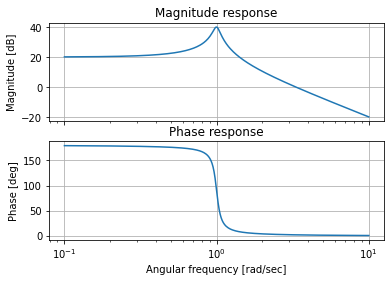

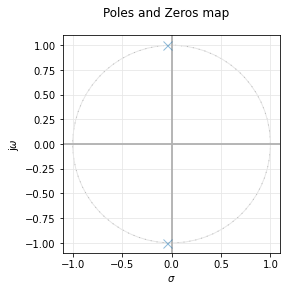

In [1]:
from splane import pzmap, grpDelay, bodePlot
from scipy.signal import TransferFunction,bode
import matplotlib.pyplot as plt
import numpy as npy

## Simulación matemática.
num = [-10]
den = [1,1/10,1]
 
my_tf = TransferFunction( num, den )

## Ploteo.
bodePlot(my_tf)
pzmap(my_tf)

<div class="alert alert-block alert-warning">
<b>Comentario:</b> Se obtuvo la misma respuesta en frecuencia que la simulada y en el plazo Z los polos corresponden a complejos conjugados sobre la circunferencia de radio unitario.
</div>

<div class="alert alert-block alert-info">
<b>3)</b> Forma de Butterworth.
</div></div>

<img src="./caps/circB.jpg" align="center" width="800" /> 

<img src="./caps/bodeB2.jpg" align="center" width="800" /> 

<div class="alert alert-block alert-warning">
<b>Comentario:</b> Para obtener una respuesta en frecuencia como la de un filtro de tipo Butter se partió desde el requisito de tener una caída de -3dB de la ganancia en $w_o$ = 1. Para ello se volvieron a recalcular los valores de los componentes R1,R2 y R3. También se debió considerar un reajuste en $Q = \frac{\sqrt{2}}{2}$ y en la R1 ya que la misma no tenía su valor fijado en 0dB.</div>

<div class="alert alert-block alert-info">
<b>4)</b> Simulación forma pasabanda.
</div></div>

Se utiliza el circuito original pero se cambia la salida para obtener el Bode:

<img src="./caps/pasabanda.jpg" align="center" width="800" /> 

Respuesta en frecuencia.

<img src="./caps/pasabandabode.jpg" align="center" width="800" /> 

<div class="alert alert-block alert-warning">
<b>Comentario:</b> Una de las soluciones que se propuso para obtener un circuito pasabanda es utilizar como salida $V_{bp}$ sin realizar ninguna modificación ni agregado al circuito original, aprovechando esta característica del circuito de Ackerberg-Mossberg. Como se observa en la imágen, la respuesta en frecuencia es similar a la de un filtro pasabanda con centro del BW ubicado en $w_o = 1$ (159mHz). Sin embargo, dicho valores deberían ser ajustados para que el circuito atenue fuera de la vecindad de $w_o$.</div>

<div class="alert alert-block alert-info">
<b>5)</b> Análisis de dispersión.
</div></div>

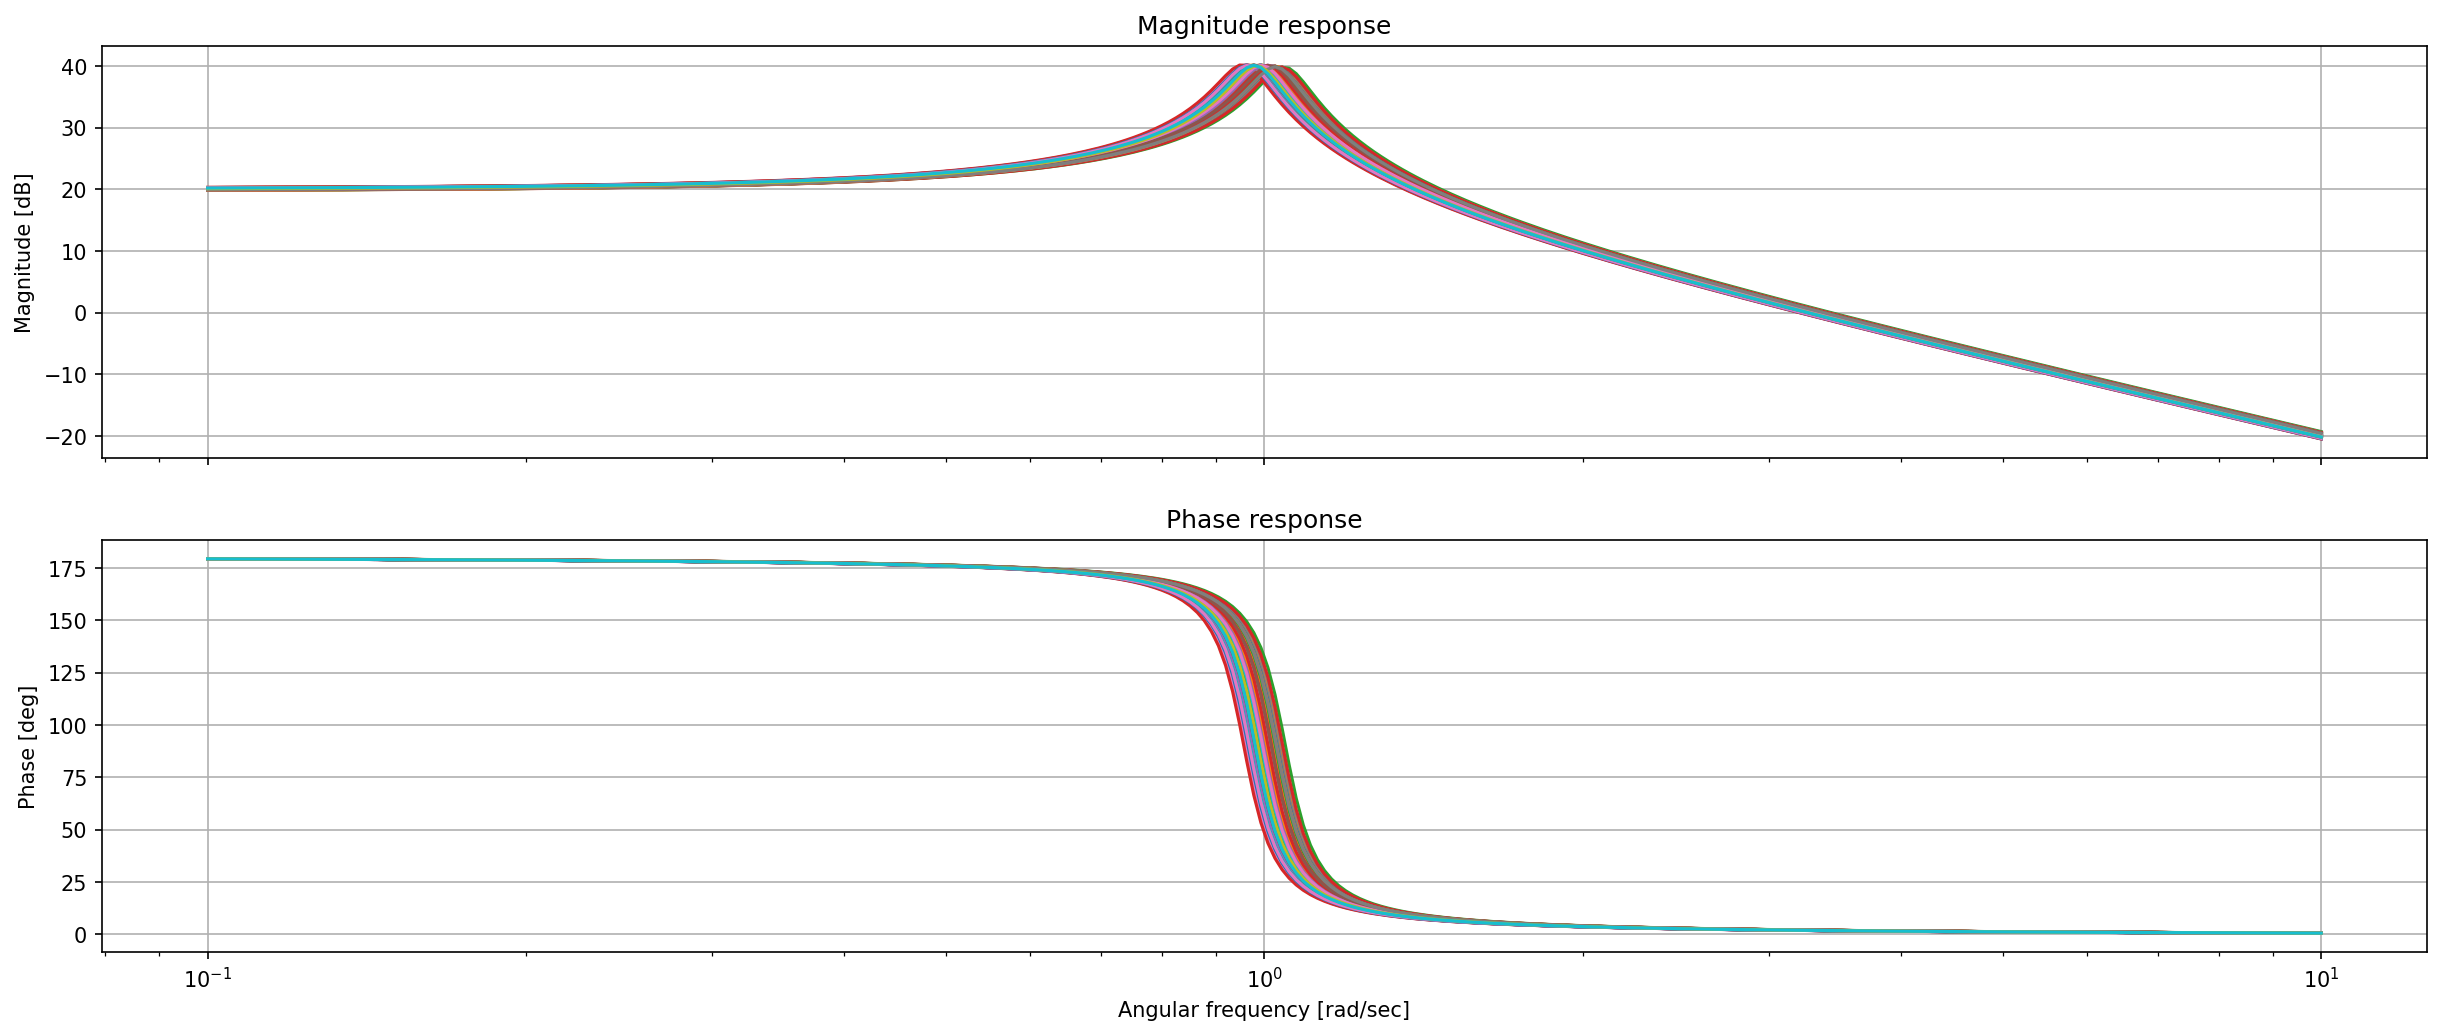

In [7]:
## Módulos.
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from splane import pzmap, grpDelay, bodePlot, convert2SOS
from scipy.signal import TransferFunction

fig_sz_x = 20
fig_sz_y = 8
fig_dpi = 150 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

## Parámetros.
NN = 100 # Realizaciones.
tol = 5 # Tolerancia de componentes

Q = 10
wo = 1

R1 = 200
R2 = 20e3
R3 = 2e3
C = 500e-6

## Dispersión de valores para C, R2 y R3.
all_C = np.random.uniform(C * (100-tol/2)/100 , C * (100+tol/2)/100, size=NN )
all_R2 = np.random.uniform(R2 * (100-tol/2)/100 , R2 * (100+tol/2)/100, size=NN )
all_R3 = np.random.uniform(R3 * (100-tol/2)/100 , R3 * (100+tol/2)/100, size=NN )

plt.close('all')

fig_hdl = plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
axes_hdl = fig_hdl.subplots(2, 1, sharex='col')
fig_id = fig_hdl.number

## Ploteo.
for (this_C, this_R2, this_R3) in zip( all_C, all_R2, all_R3):
    this_wo = 1 / (this_C * this_R3)
    this_Q = this_R2 / this_R3
    this_K = this_R3 / R1

    my_tf = TransferFunction( [-this_K * (this_wo**2)], [1, this_wo/Q,this_wo**2] )
    
    _, axes_hdl = bodePlot(my_tf, fig_id)

<div class="alert alert-block alert-warning">
<b>Comentario:</b> Para una la simulación de la transferencia para distintos valores de R2, R3 y C se observa una gran dispersión en torno a $w_o$ lo que hace evidente la influencia de C y R3 en el cálculo de la pulsación angular.</div>

Text(0.5, 1.0, 'Q para cada experimento')

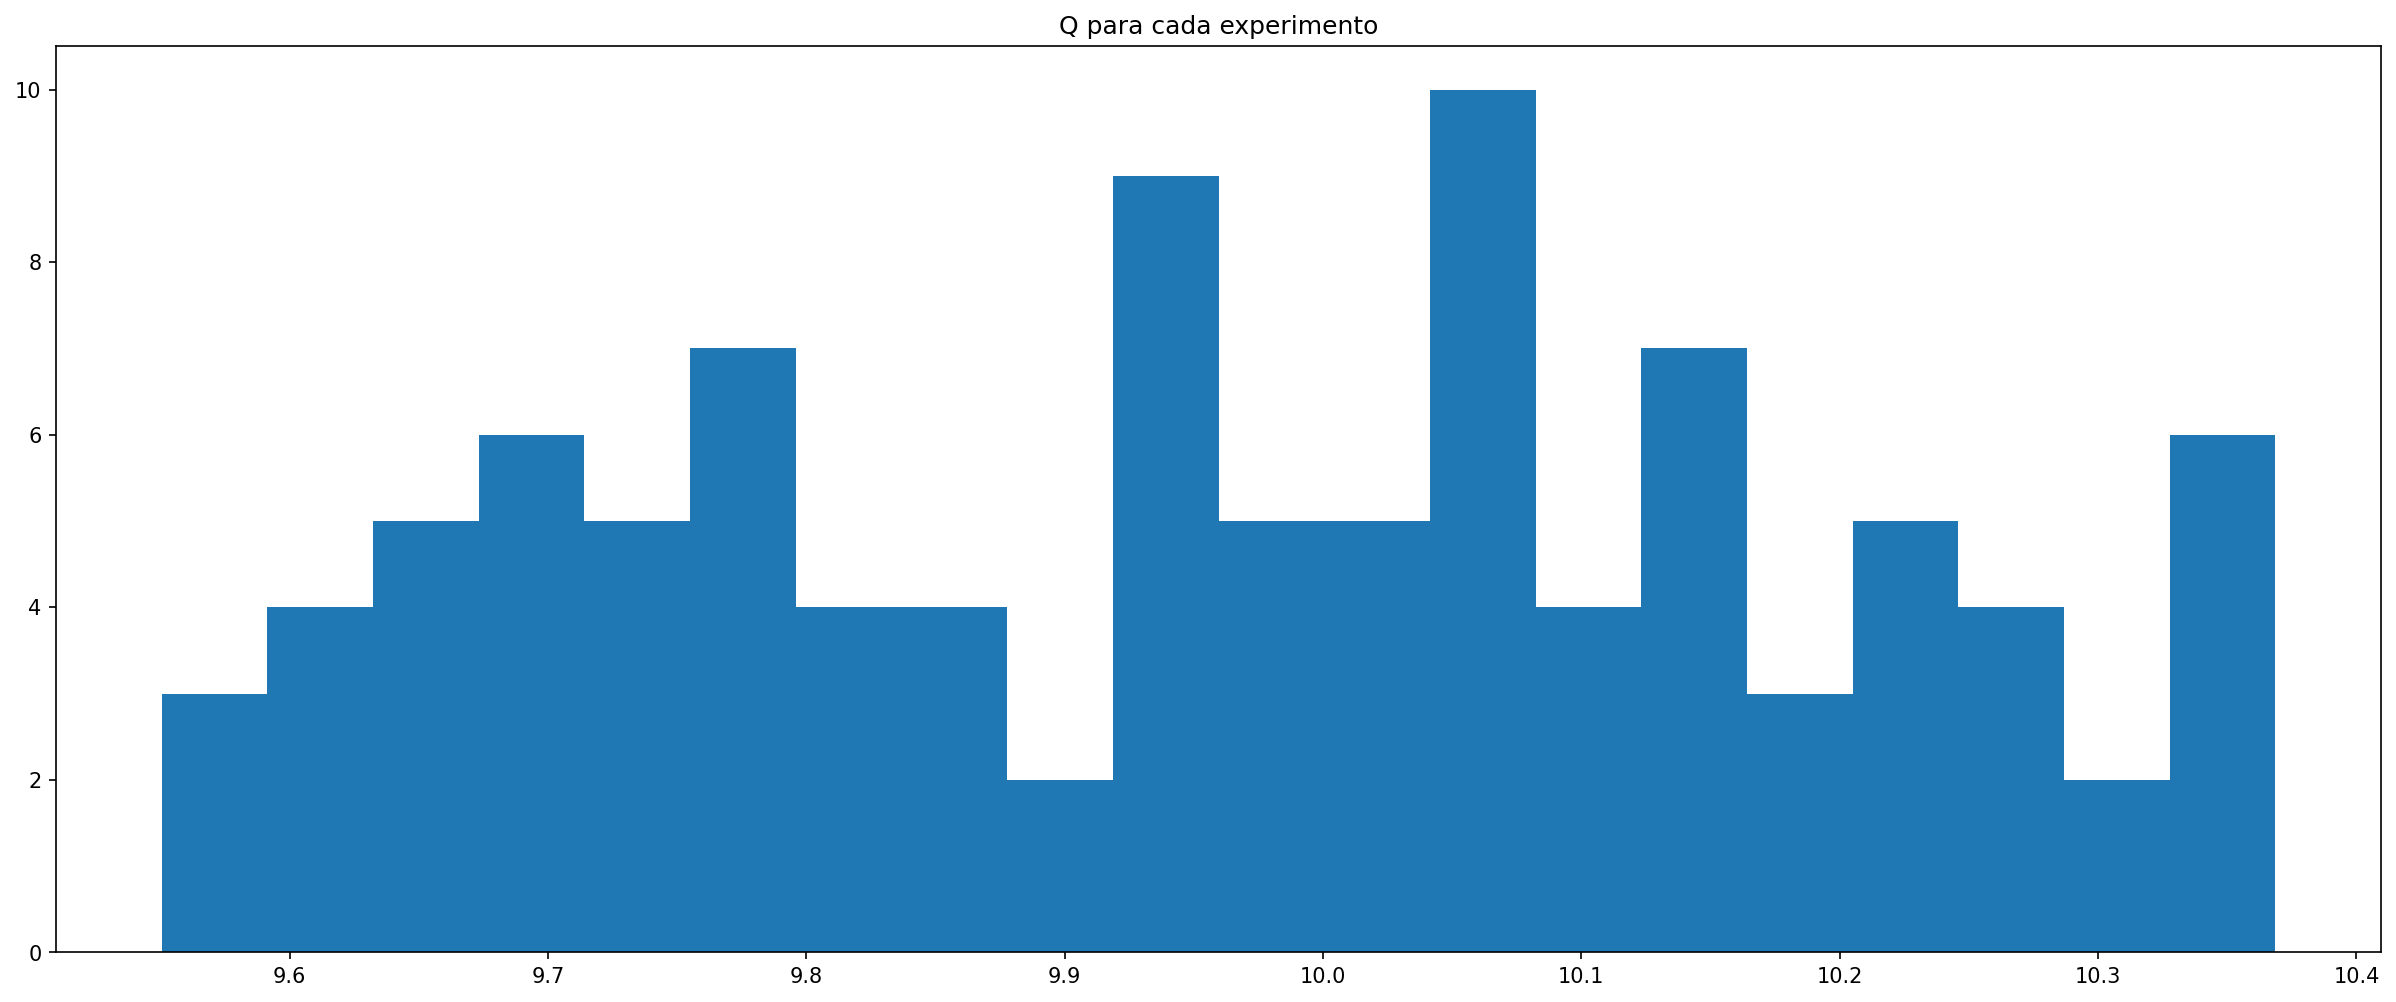

In [8]:
## Histograma para Q.
all_QQ = all_R2 / all_R3

plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
plt.hist( all_QQ, 20 )
plt.title('Q para cada experimento')    

Text(0.5, 1.0, '$\\omega_0$ para cada experimento')

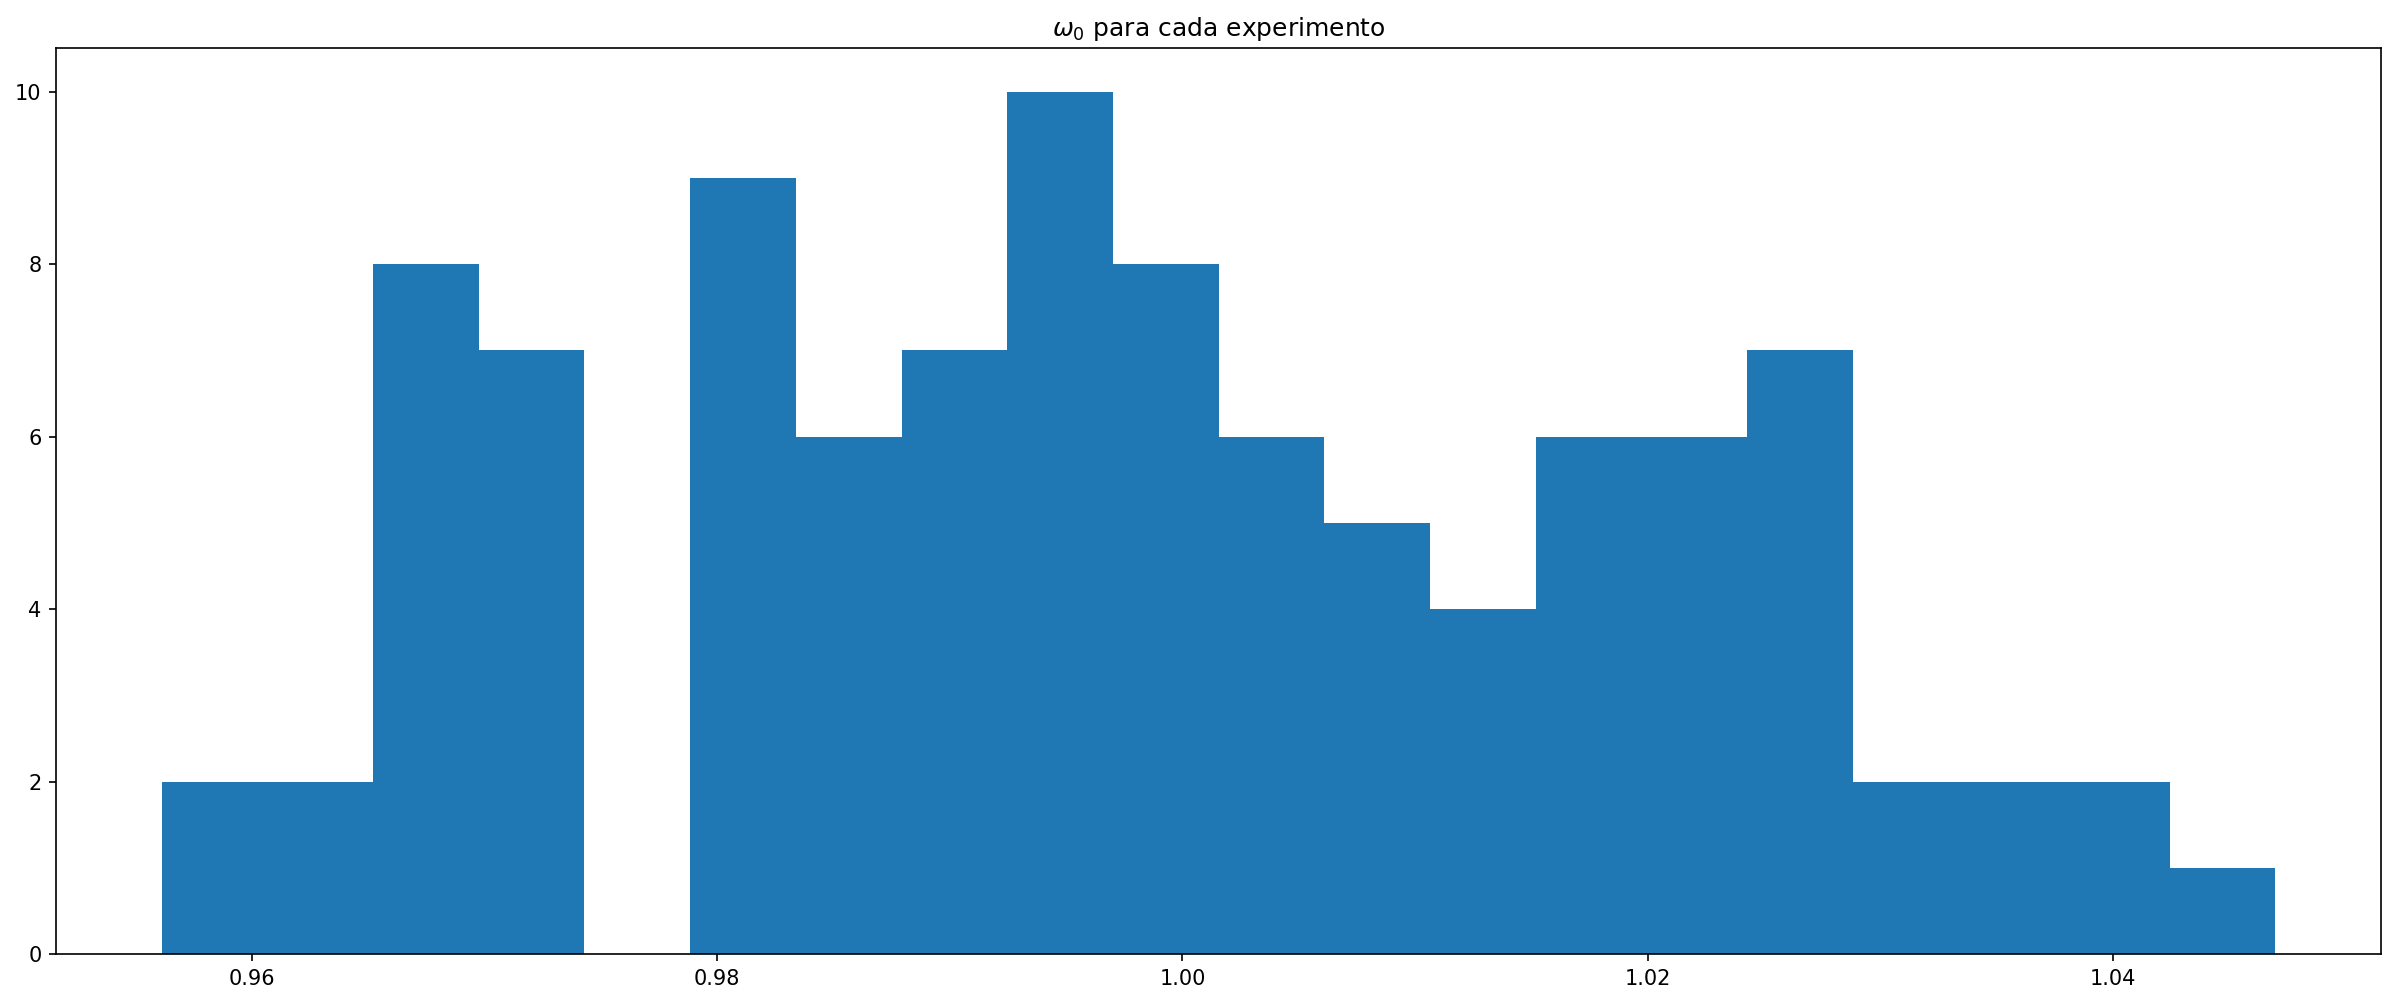

In [9]:
## Histograma para $w_o$
all_wo = 1 / (all_C * all_R3)

plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
plt.hist( all_wo, 20 )
plt.title('$\omega_0$ para cada experimento')

<div class="alert alert-block alert-warning">
<b>Comentario:</b> Con un análisis estadístico vemos que tanto Q y $w_o$ parecen acercarse a una distribución normal. En el centro se evidencian los valores más probables. Para ambos casos los valores de $w_o$ y Q estan influencias por 2 parámetros, con lo que podría existir alguna compensación entre ellos al realizar las dispersiones. Se puede concluir que las variaciones de Q son aceptables para una tolerancia del 5% en los componentes manteniéndose en un rango de entre 9,4 y 10,4.</div>